## TP2 : Pré-traitement des données

In [ ]:
import pandas as pd                 # for data manipulation and analysis
import matplotlib.pyplot as plt     # for data visualization

Importez les bibliothèques nécessaires, chargez le jeu de données.

In [2]:
horses = pd.read_csv('data/horse.csv')
# Transtypage des variables catégorielles
for col in horses.columns:
    if horses[col].dtype == 'object':
        horses[col] = horses[col].astype('category')
    else:
        horses[col] = horses[col].astype('float64')

In [3]:
horses.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101.0,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300.0,0.0,0.0,no
1,yes,adult,534817.0,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208.0,0.0,0.0,no
2,no,adult,530334.0,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0.0,0.0,0.0,yes
3,yes,young,5290409.0,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208.0,0.0,0.0,yes
4,no,adult,530255.0,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300.0,0.0,0.0,no


## Nettoyage des données

Supprimez les colonnes inutiles et gérez les valeurs manquantes.

In [4]:
class Nettoyeur_perso():
    """
    Classe de nettoyage des données personnalisée.
    Attributs :
    - col_a_retirer : liste des colonnes à retirer systématiquement
    - seuil : seuil de pourcentage de valeurs manquantes au-delà duquel une colonne est supprimée
    Méthodes :
    - fit : apprend les colonnes à supprimer et les valeurs de remplacement pour les autres colon
    - transform : applique le nettoyage aux données
    - fit_transform : combine fit et transform
    """
    def __init__(self, col_a_retirer = [], seuil=0.6) -> None:
        self.col_a_retirer = col_a_retirer
        self.seuil = seuil
    
    def fit(self, X, y=None):
        """
        Apprend les colonnes à supprimer et les valeurs de remplacement pour les autres colonnes.
        """
        self.columns_supprime = list(set(X.columns[X.isna().mean() > self.seuil].tolist() + self.col_a_retirer))
        print(f"Colonnes supprimées : {self.columns_supprime}")
        self.values_remplace = {}
        for col in set(X.columns) - set(self.columns_supprime):
            if X[col].dtype != 'float64':
                self.values_remplace[col] = X[col].mode()[0]# Mode pour les variables catégorielles mode = valeur la plus fréquente
            else:
                self.values_remplace[col] = X[col].mean()# Moyenne pour les variables numériques
        return self
    
    def transform(self, X, y=None):
        """
        Applique le nettoyage aux données.
        """
        Xtransformed = X.copy()
        Xtransformed = Xtransformed.drop(self.columns_supprime, axis=1)
        for col, val in self.values_remplace.items():
            Xtransformed[col] = Xtransformed[col].fillna(val)
        return Xtransformed
    
    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)

# Nettoyage des données , suppression des colonnes inutiles et imputation des valeurs manquantes
# surgery : données post-opératoires, pas utiles pour le diagnostic
# hospital_number : identifiant unique, pas utile pour le diagnostic
# outcome : données post-opératoires, pas utiles pour le diagnostic
# lesion_1, lesion_2, lesion_3 : données post-opératoires, pas utiles pour le diagnostic
# cp_data : données post-opératoires, pas utiles pour le diagnostic
# Plusieurs colonnes avec plus de 60% de valeurs manquantes
imputer = Nettoyeur_perso(col_a_retirer=['surgery', 'hospital_number', 'outcome', 'lesion_1', 
    'lesion_2', 'lesion_3', 'cp_data'],
    seuil=0.6)
# Apprentissage des colonnes à supprimer et des valeurs de remplacement, puis application du nettoyage
horsesClean = imputer.fit_transform(horses)
print(horsesClean.shape)
horsesClean.head()

Colonnes supprimées : ['hospital_number', 'lesion_2', 'outcome', 'surgery', 'lesion_1', 'abdomo_protein', 'lesion_3', 'nasogastric_reflux_ph', 'cp_data']
(299, 19)


,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,surgical_lesion
0,adult,38.5,66.0,28.0,cool,reduced,normal_pink,more_3_sec,extreme_pain,absent,severe,slight,none,decreased,distend_large,45.0,8.4,cloudy,no
1,adult,39.2,88.0,20.0,cool,normal,pale_cyanotic,less_3_sec,mild_pain,absent,slight,slight,none,absent,other,50.0,85.0,cloudy,no
2,adult,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,slight,none,normal,normal,33.0,6.7,cloudy,no
3,young,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,none,less_1_liter,decreased,distend_large,48.0,7.2,serosanguious,yes
4,adult,37.3,104.0,35.0,cool,normal,dark_cyanotic,more_3_sec,mild_pain,hypomotile,none,slight,none,absent,distend_large,74.0,7.4,cloudy,no


## Encodage des variables catégorielles

Utilisez des techniques d'encodage appropriées pour les variables catégorielles.

### Aide :

Pour les variables nominales :

* [sklearn.preprocessing.LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)

* [pandas.get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)

* ... bien d'autres sur [sklearn.preprocessing](https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features)

Pour les variables ordinales :

* [sklearn.preprocessing.OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html) pour les variables ordinales.


In [5]:
from sklearn.preprocessing import OrdinalEncoder

ordinalColumns = ['temp_of_extremities', 'pain']
nominalColumns = horsesClean.select_dtypes(include='category').columns.drop(ordinalColumns)
horsesEncoded = horsesClean.copy()

# OrdinalEncoder
encoderOrder = OrdinalEncoder(categories=
                             [['cold', 'cool', 'normal', 'warm'],
                               ['alert', 'depressed', 'mild_pain', 'severe_pain', 'extreme_pain']])#attention à l'ordre des catégories

horsesEncoded[ordinalColumns] = encoderOrder.fit_transform(horsesEncoded[ordinalColumns])

# encoder le reste
encodedHorses = pd.get_dummies(horsesEncoded, columns=nominalColumns, drop_first=True)


encodedHorses.info()
encodedHorses.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 38 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   rectal_temp                       299 non-null    float64
 1   pulse                             299 non-null    float64
 2   respiratory_rate                  299 non-null    float64
 3   temp_of_extremities               299 non-null    float64
 4   pain                              299 non-null    float64
 5   packed_cell_volume                299 non-null    float64
 6   total_protein                     299 non-null    float64
 7   age_young                         299 non-null    bool   
 8   peripheral_pulse_increased        299 non-null    bool   
 9   peripheral_pulse_normal           299 non-null    bool   
 10  peripheral_pulse_reduced          299 non-null    bool   
 11  mucous_membrane_bright_red        299 non-null    bool   
 12  mucous_m

,rectal_temp,pulse,respiratory_rate,temp_of_extremities,pain,packed_cell_volume,total_protein,age_young,peripheral_pulse_increased,peripheral_pulse_normal,...,rectal_exam_feces_decreased,rectal_exam_feces_increased,rectal_exam_feces_normal,abdomen_distend_small,abdomen_firm,abdomen_normal,abdomen_other,abdomo_appearance_cloudy,abdomo_appearance_serosanguious,surgical_lesion_yes
0,38.5,66.0,28.0,1.0,4.0,45.0,8.4,False,False,False,...,True,False,False,False,False,False,False,True,False,False
1,39.2,88.0,20.0,1.0,2.0,50.0,85.0,False,False,True,...,False,False,False,False,False,False,True,True,False,False
2,38.3,40.0,24.0,2.0,2.0,33.0,6.7,False,False,True,...,False,False,True,False,False,True,False,True,False,False
3,39.1,164.0,84.0,0.0,1.0,48.0,7.2,True,False,True,...,True,False,False,False,False,False,False,False,True,True
4,37.3,104.0,35.0,1.0,2.0,74.0,7.4,False,False,True,...,False,False,False,False,False,False,False,True,False,False


In [6]:
encodedHorses.to_csv('data/horse_clean.csv', index=False)

# Partie 2 : Arbres de décision

Par simplicité, nous allons juger nos différents modèle à travers un validation holdout. Nous allons donc séparer notre jeu de données en deux parties : une partie pour l'entrainement et une partie pour le test.

Créez 4 variables : `X_train`, `X_test`, `y_train`, `y_test` en utilisant la fonction `train_test_split` de sklearn.

[sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [7]:
from sklearn.model_selection import train_test_split

X = encodedHorses.drop('surgical_lesion_yes', axis=1)
y = encodedHorses['surgical_lesion_yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 209 entries, 224 to 102
Data columns (total 37 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   rectal_temp                       209 non-null    float64
 1   pulse                             209 non-null    float64
 2   respiratory_rate                  209 non-null    float64
 3   temp_of_extremities               209 non-null    float64
 4   pain                              209 non-null    float64
 5   packed_cell_volume                209 non-null    float64
 6   total_protein                     209 non-null    float64
 7   age_young                         209 non-null    bool   
 8   peripheral_pulse_increased        209 non-null    bool   
 9   peripheral_pulse_normal           209 non-null    bool   
 10  peripheral_pulse_reduced          209 non-null    bool   
 11  mucous_membrane_bright_red        209 non-null    bool   
 12  mucous_memb

#### Arbre de décision

Réalisez un arbre de décision avec la fonction [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) de sklearn.

- Entraînez le modèle sur les données d'entraînement.
- Évaluez la performance du modèle sur les données de test en utilisant des métriques telles que l'exactitude, la précision, le rappel et le score F1.
- Visualisez l'arbre de décision en utilisant la fonction [plot_tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html).
- Expérimentez avec différents hyperparamètres de l'arbre de décision (comme la profondeur maximale, le critère de division, etc.) et observez leur impact sur la performance du modèle.

In [8]:
from sklearn.tree import DecisionTreeClassifier
# max_depth : profondeur maximale de l'arbre
# min_samples_split : nombre minimal d'observations pour pouvoir spliter un noeud
# min_samples_leaf : nombre minimal d'observations pour pouvoir créer un noeud
# splitter : critère de split
# random_state : graine pour la reproductibilité

# On instancie notre modèle
tree = DecisionTreeClassifier(
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=1,
    splitter='best',
    random_state=42,
    )

# On entraine notre modèle
tree.fit(X_train, y_train)

# On prédit les valeurs de y pour X_test
y_pred = tree.predict(X_test)

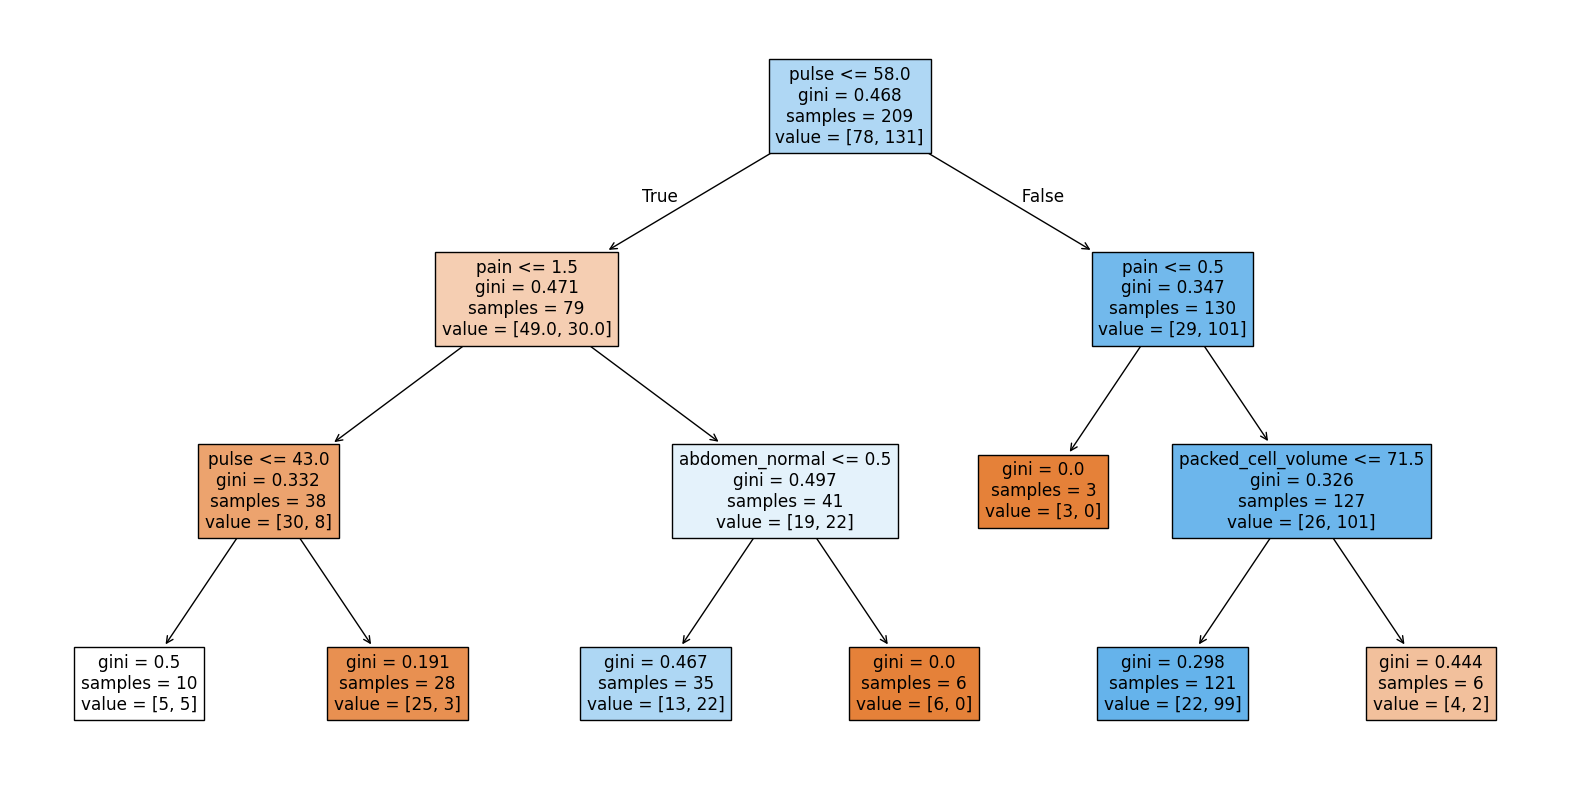

In [9]:
from sklearn.tree import plot_tree

# On affiche l'arbre
plt.figure(figsize=(20,10))
plot_tree(tree, filled=True, feature_names=X_train.columns)
plt.show()

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print("score :",tree.score(X_test, y_test))

# On crée une matrice de confusion
cm = confusion_matrix(y_test, y_pred)
print("Matrice confusion : \n",cm)

# On affiche le rapport de classification
print(classification_report(y_test, y_pred))

score : 0.7111111111111111
Matrice confusion : 
 [[ 9 22]
 [ 4 55]]
              precision    recall  f1-score   support

       False       0.69      0.29      0.41        31
        True       0.71      0.93      0.81        59

    accuracy                           0.71        90
   macro avg       0.70      0.61      0.61        90
weighted avg       0.71      0.71      0.67        90



## BONUS : Arbres de décision Implémentation

In [11]:
class ArbreDecision:
    """
    Implémentation simple d'un arbre de décision pour la classification.
    """

    def __init__(self, profondeur_max=None):
        # Profondeur maximale de l'arbre
        self.profondeur_max = profondeur_max
        # L'arbre sera construit sous forme de structure imbriquée
        self.arbre = None

    def fit(self, X, y):
        """
        Entraîne l'arbre de décision sur les données X et les étiquettes y.
        """
        self.arbre = self._construire_arbre(X, y, profondeur=0)
        return self

    def _gini(self, probabilites):
        """
        Calcule l'indice de Gini pour une liste de probabilités.
        """
        return 1 - sum(p ** 2 for p in probabilites if p > 0)
    
    def _construire_arbre(self, X, y, profondeur):
        """
        Construit récursivement l'arbre de décision.
        """
        nb_echantillons, nb_caracteristiques = X.shape
        classes_uniques = set(y)

        # Critère d'arrêt : toutes les classes sont identiques ou profondeur max atteinte
        if len(classes_uniques) == 1 or (self.profondeur_max and profondeur >= self.profondeur_max):
            # Retourne la classe majoritaire
            classe_majoritaire = max(classes_uniques, key=list(y).count)
            return classe_majoritaire

        # Recherche de la meilleure séparation
        meilleure_caracteristique, meilleur_seuil = self._meilleure_separation(X, y, nb_caracteristiques)
        if meilleure_caracteristique is None:
            # Si aucune séparation n'est trouvée, retourne la classe majoritaire
            classe_majoritaire = max(classes_uniques, key=list(y).count)
            return classe_majoritaire

        # Sépare les données selon la meilleure caractéristique et seuil trouvés
        indices_gauche = X[:, meilleure_caracteristique] < meilleur_seuil
        indices_droite = X[:, meilleure_caracteristique] >= meilleur_seuil

        # Construction récursive des sous-arbres gauche et droite
        sous_arbre_gauche = self._construire_arbre(X[indices_gauche], y[indices_gauche], profondeur + 1)
        sous_arbre_droite = self._construire_arbre(X[indices_droite], y[indices_droite], profondeur + 1)

        # Retourne un nœud interne sous forme de tuple
        return (meilleure_caracteristique, meilleur_seuil, sous_arbre_gauche, sous_arbre_droite)

    def _meilleure_separation(self, X, y, nb_caracteristiques):
        """
        Trouve la meilleure caractéristique et le meilleur seuil pour séparer les données.
        """
        meilleur_gini = float('inf')
        meilleure_caracteristique, meilleur_seuil = None, None

        for caracteristique in range(nb_caracteristiques):
            # On teste chaque valeur unique comme seuil
            seuils = set(X[:, caracteristique])
            for seuil in seuils:
                indices_gauche = X[:, caracteristique] < seuil
                indices_droite = X[:, caracteristique] >= seuil

                # On ignore les séparations qui ne divisent pas les données
                if len(y[indices_gauche]) == 0 or len(y[indices_droite]) == 0:
                    continue

                # Calcul du Gini pondéré pour cette séparation
                gini_gauche = self._gini([list(y[indices_gauche]).count(c) / len(y[indices_gauche]) for c in set(y)])
                gini_droite = self._gini([list(y[indices_droite]).count(c) / len(y[indices_droite]) for c in set(y)])
                gini_pondere = (len(y[indices_gauche]) * gini_gauche + len(y[indices_droite]) * gini_droite) / len(y)

                # Mise à jour si on trouve une meilleure séparation
                if gini_pondere < meilleur_gini:
                    meilleur_gini = gini_pondere
                    meilleure_caracteristique = caracteristique
                    meilleur_seuil = seuil

        return meilleure_caracteristique, meilleur_seuil

    def predict(self, X):
        """
        Prédit la classe pour chaque échantillon de X.
        """
        return [self._predire_echantillon(echantillon, self.arbre) for echantillon in X]

    def _predire_echantillon(self, echantillon, arbre):
        """
        Prédit la classe pour un seul échantillon en parcourant l'arbre.
        """
        # Si on atteint une feuille, retourne la classe
        if not isinstance(arbre, tuple):
            return arbre

        caracteristique, seuil, sous_arbre_gauche, sous_arbre_droite = arbre
        if echantillon[caracteristique] < seuil:
            return self._predire_echantillon(echantillon, sous_arbre_gauche)
        else:
            return self._predire_echantillon(echantillon, sous_arbre_droite)


In [14]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

Arbre = ArbreDecision(profondeur_max=3)
Arbre.fit(X_train.to_numpy(), y_train.to_numpy())
y_pred = Arbre.predict(X_test.to_numpy())
print("score :", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# On affiche le rapport de classification
print(classification_report(y_test, y_pred))

score : 0.7111111111111111
[[ 9 22]
 [ 4 55]]
              precision    recall  f1-score   support

       False       0.69      0.29      0.41        31
        True       0.71      0.93      0.81        59

    accuracy                           0.71        90
   macro avg       0.70      0.61      0.61        90
weighted avg       0.71      0.71      0.67        90

